In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
%matplotlib ipympl

In [2]:
df = pd.read_excel('cleaned_data.xlsx')
df

,Site Name,Site Use,Date,Sample ID,Location ID,11ClPF3OUDS,4:2FTS,6:2FTS,8:2FTS,9ClPF3ONS,...,PFNA,PFNDCA,PFOA,PFOS,PFOSA,PFPA,PFPES,PFTEDA,PFTRIDA,PFUNDCA
0,4-S Ranch WRF,Wastewater Treatment Plants,03/03/2021,BFP Cake,BFP CAKE,0.019843,0.023307,0.059843,0.030866,0.031496,...,0.011969,0.007874,0.020787,0.056693,0.066142,0.020472,0.040945,0.066142,0.022677,0.020472
1,4-S Ranch WRF,Wastewater Treatment Plants,11/10/2020,BFP Cake,BFP CAKE,0.019704,0.023153,0.059113,0.031034,0.033005,...,0.012315,0.007882,0.021182,0.054187,0.068966,0.020690,0.040394,0.064039,0.022660,0.020690
2,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,01/06/2021,21010600414,JW_BS_CAKE,0.011955,0.005978,0.011955,0.011955,0.005978,...,0.005978,0.034209,0.007178,0.168043,0.017885,0.005978,0.011955,0.005978,0.005978,0.005978
3,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,04/07/2021,21040700441,JW_BS_CAKE,0.022238,0.007410,0.014851,0.014851,0.014851,...,0.007410,0.014851,0.007410,0.110815,0.007410,0.007410,0.007410,0.014851,0.014851,0.007410
4,A.K. Warren Water Resource Facility,Wastewater Treatment Plants,07/06/2021,21070600411,JW_BS_CAKE,0.022677,0.007564,0.015143,0.015143,0.015143,...,0.007564,0.016758,0.008994,0.050427,0.007564,0.007564,0.007564,0.015143,0.015143,0.007564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Yreka City WWTP,Wastewater Treatment Plants,10/20/2021,21J0884-01 Biosolids,BIOSOLIDS,0.019085,0.022453,0.056132,0.030873,0.030873,...,0.011507,0.025260,0.020208,0.053326,0.064552,0.028066,0.039293,0.061746,0.021611,0.019646
880,Yuba City WWTF,Wastewater Treatment Plants,03/18/2021,202103190266,BIO-001,0.014537,0.048967,0.048967,0.073451,0.048967,...,0.014537,0.014537,0.014537,0.030604,0.014537,0.014537,0.073451,0.014537,0.014537,0.014537
881,Yuba City WWTF,Wastewater Treatment Plants,05/18/2021,202105190414,BIO-001,0.014938,0.050088,0.050088,0.074692,0.050088,...,0.014938,0.014938,0.014938,0.028998,0.014938,0.014938,0.074692,0.014938,0.014938,0.014938
882,Yuba City WWTF,Wastewater Treatment Plants,08/25/2021,202108260557,BIO-001,0.011602,0.034991,0.034991,0.034991,0.011602,...,0.011602,0.018416,0.013444,0.060773,0.013260,0.011602,0.011602,0.011602,0.011602,0.011602


# Deminsionalty Reduction
The data has a lot of deminsions many of which are highly corralated. Lets try some reduction and visuilazation methods

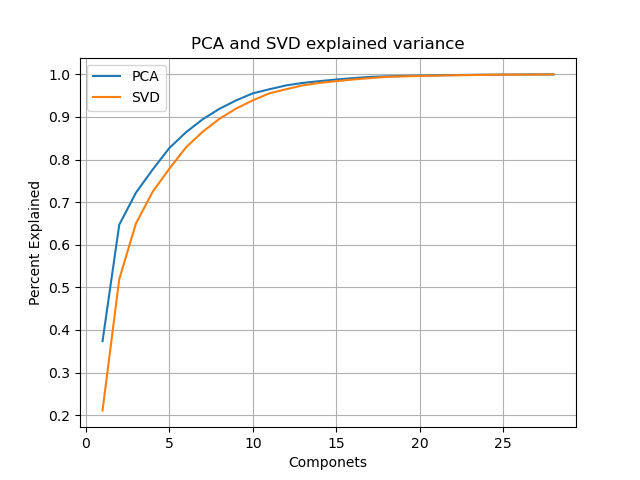

In [3]:
# get the data
data = df[df.columns[5:]].to_numpy()

# PCA
percent_explained_pca = []
percent_explained_svd = []
max_componets = df.shape[1] - 5
num_comps = list(range(1, max_componets))
best_num_comps = 10
for i in num_comps:
    test_pca = PCA(n_components=i, random_state=42)
    test_pca.fit(data)
    percent_explained_pca.append(sum(test_pca.explained_variance_ratio_))

    test_svd = TruncatedSVD(n_components=i, random_state=42)
    test_svd.fit(data)
    percent_explained_svd.append(sum(test_svd.explained_variance_ratio_))

    # save best models for later
    if i == best_num_comps:
        svd = test_svd
        svd_data = svd.transform(data)
        
        pca = test_pca
        pca_data = pca.transform(data)


# make dataframes for each group for later use
df_idx = df[df.columns[:5]]

df_pca = pd.DataFrame(data = pca_data, columns = ['pca_%s' % i for i in range(best_num_comps)])
df_pca = pd.concat([df_idx, df_pca], axis = 1)

df_svd= pd.DataFrame(data = svd_data, columns = ['svd_%s' % i for i in range(best_num_comps)])
df_svd = pd.concat([df_idx, df_svd], axis = 1)


                       
plt.plot(num_comps, percent_explained_pca, label = 'PCA')
plt.plot(num_comps, percent_explained_svd, label = 'SVD')
plt.xlabel("Componets")
plt.ylabel("Percent Explained")
plt.title('PCA and SVD explained variance')
plt.grid()
plt.legend()
plt.show()

# Multidimensional scaling
MDA is a deminsion reduction technique used to visiliuse high deminsionalty data in lower deminsion. From the sklearn documentation

"Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space. In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces. " https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling

I will use it here to see if there is any diffence in distribution between the PCA, SVD and untransformed data


In [4]:
embedding = MDS(n_components=3, normalized_stress='auto', random_state=42)
pca_ploting_data = embedding.fit_transform(pca_data)
svd_ploting_data = embedding.fit_transform(svd_data)
normal_ploting_data = embedding.fit_transform(data)

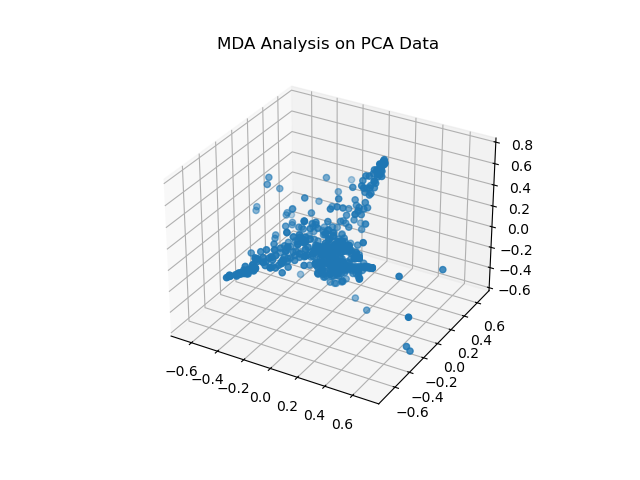

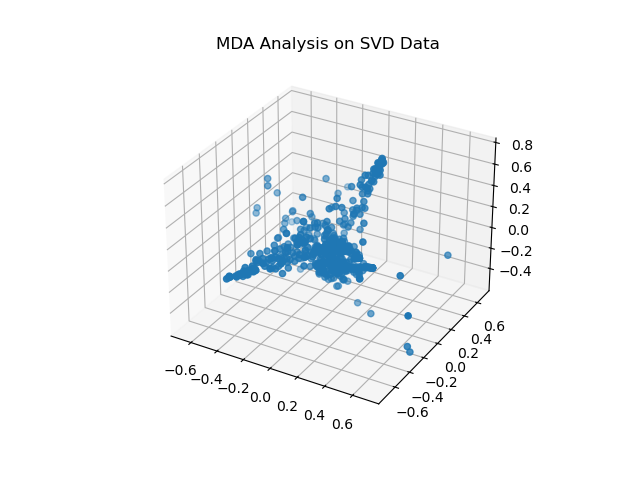

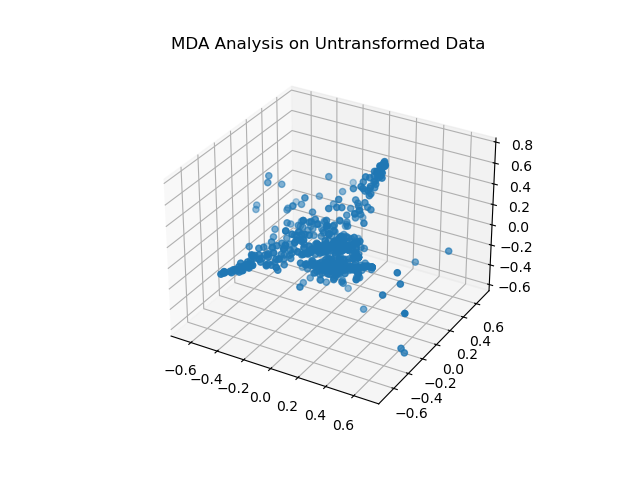

In [5]:
def make_3d_graph(data, title, groups = None, filter = None):
    
    if filter is not None:
        data = np.delete(data, filter, axis=0)
        groups = np.delete(groups, filter, axis=0)
    
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    if groups is not None:
        ax.scatter(x, y, z, c = groups)
    else:
        ax.scatter(x, y, z)
    ax.axes.set_xlim3d(left= min(x), right=max(x)) 
    ax.axes.set_ylim3d(bottom=min(y), top=max(y)) 
    ax.axes.set_zlim3d(bottom=min(z), top=max(z)) 
    ax.title.set_text(title)
    plt.show()

make_3d_graph(pca_ploting_data, 'MDA Analysis on PCA Data')
make_3d_graph(svd_ploting_data, 'MDA Analysis on SVD Data')
make_3d_graph(normal_ploting_data, 'MDA Analysis on Untransformed Data')

## Clustering

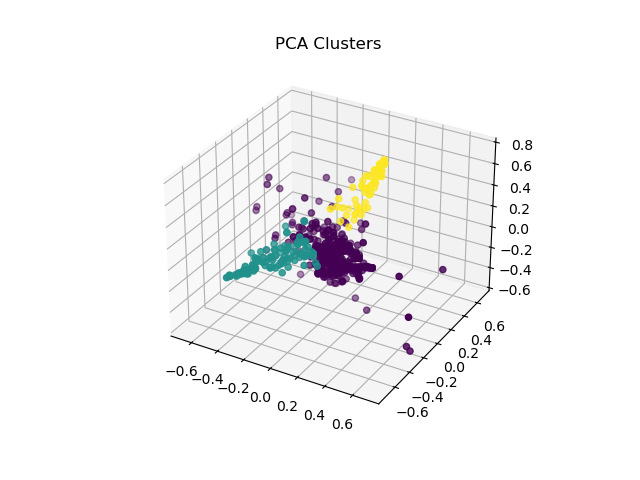

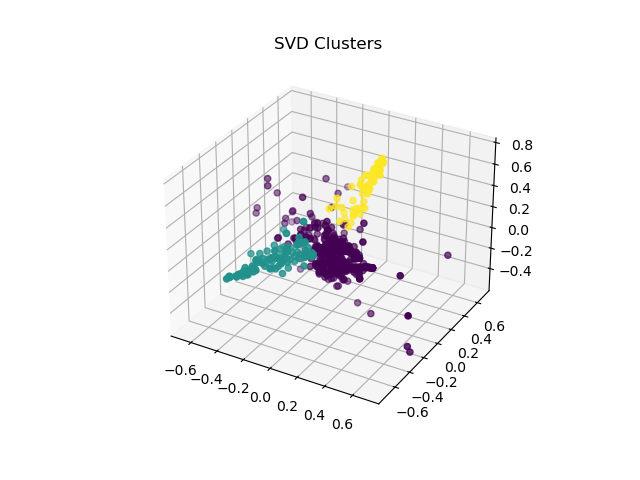

/var/folders/9m/6xlv5p9n1x7flz794y6xj8fc0000gn/T/ipykernel_20879/3957519502.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


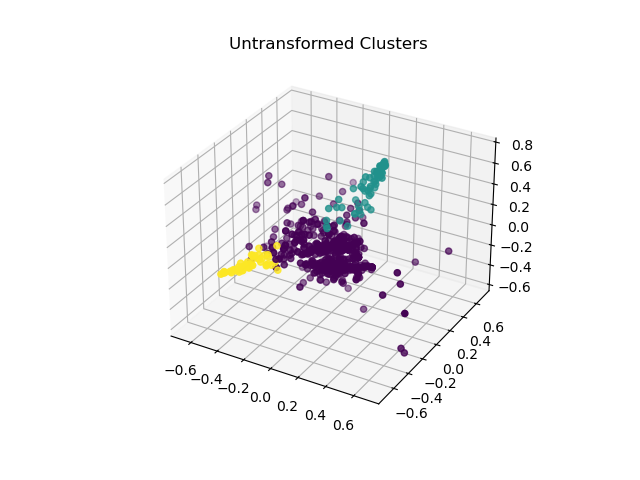

In [15]:
num_clusters = 3

clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(pca_data)
pca_groups = clustering.labels_

clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(svd_data)
svd_groups = clustering.labels_

clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(data)
normal_groups = clustering.labels_

make_3d_graph(pca_ploting_data, 'PCA Clusters', groups = pca_groups)
make_3d_graph(svd_ploting_data, 'SVD Clusters', groups = svd_groups)
make_3d_graph(normal_ploting_data, 'Untransformed Clusters', groups = normal_groups)

Site Use
Airport                                     291
Wastewater Treatment Plants                 286
Industrial - Bulk Fuel Terminal/Refinery    236
Industrial - Chrome Plating                  25
NPDES                                        21
Cleanup Program Site                         20
WDR Site                                      4
Land Disposal Site                            1
Name: count, dtype: int64


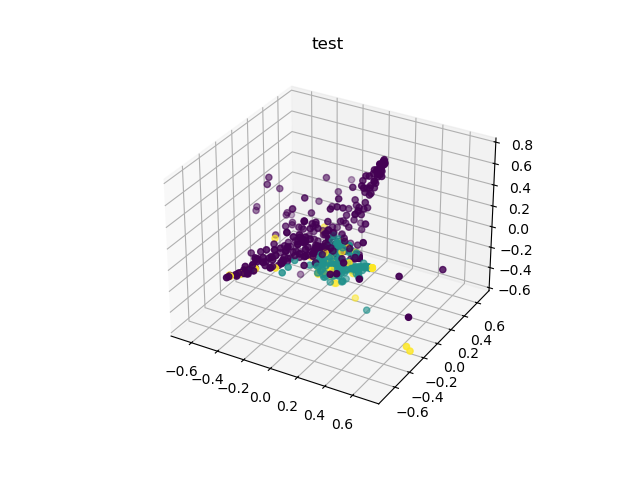

In [13]:
print(df['Site Use'].value_counts())
use_dict = {'Airport':0, 'Wastewater Treatment Plants':1, 'Industrial - Bulk Fuel Terminal/Refinery':0}
df['site_use_groups'] = df['Site Use'].apply(lambda val: use_dict.get(val, 2))

site_use_groups = df.site_use_groups.to_numpy()
del_idx = np.argwhere(site_use_groups == 2)

make_3d_graph(pca_ploting_data, 'test', groups = site_use_groups)

PCA clustering gave an accuracy of 0.5264452644526445 compared to site use groups


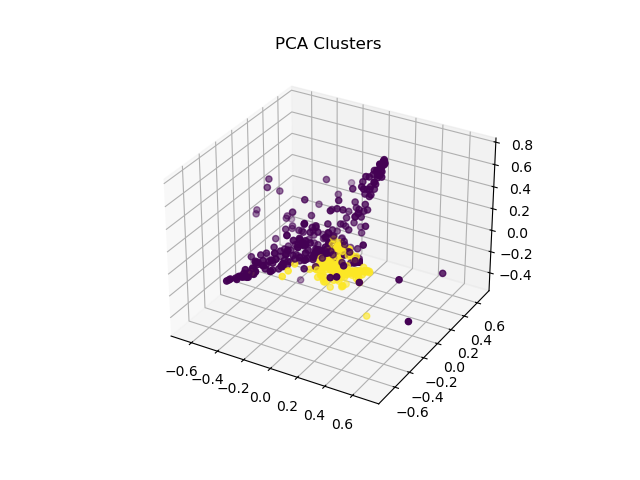

svc clustering gave an accuracy of 0.5264452644526445 compared to site use groups


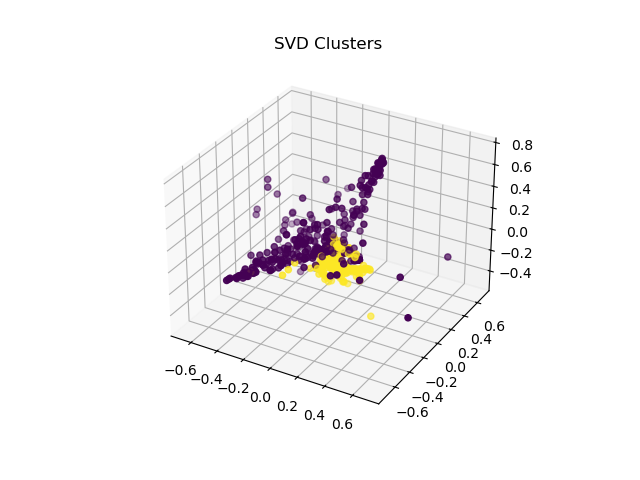

Untransformed clustering gave an accuracy of 0.5731857318573186 compared to site use groups


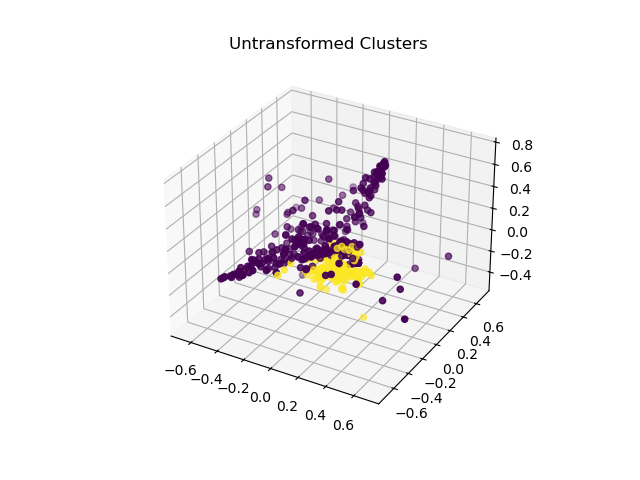

In [14]:
def label_permute_compare(true_, predicted, filter = None):
    """Gets the combination of labels that results in the highest accuracy. Modified from week 2."""
    if filter is not None:
        true_ = np.delete(true_, filter, axis=0)
        predicted = np.delete(predicted, filter, axis=0)
    
    perms = itertools.permutations(range(len(np.unique(predicted))))
    
    acc = 0.0
    best_order = 0
    for perm in perms:
        pred = [perm[i] for i in predicted]
        pred_acc = sum([1 for x, y, in zip(list(true_), pred) if x == y]) / len(true_)
        if pred_acc > acc:
            acc = pred_acc
            best_order = perm
            
    return acc

pca_acc = label_permute_compare(site_use_groups, pca_groups, filter = del_idx)

print("PCA clustering gave an accuracy of %s compared to site use groups" % pca_acc)
make_3d_graph(pca_ploting_data, 'PCA Clusters', groups = site_use_groups, filter = del_idx)

svc_acc = label_permute_compare(site_use_groups, svd_groups, filter = del_idx)
print("svc clustering gave an accuracy of %s compared to site use groups" % svc_acc)
make_3d_graph(svd_ploting_data, 'SVD Clusters', groups = site_use_groups, filter = del_idx)


normal_acc = label_permute_compare(site_use_groups, normal_groups, filter = del_idx)
print("Untransformed clustering gave an accuracy of %s compared to site use groups" % normal_acc)
make_3d_graph(normal_ploting_data, 'Untransformed Clusters', groups = site_use_groups, filter = del_idx)
normal_acc = label_permute_compare(site_use_groups, normal_groups, filter = del_idx)



In [9]:
np.unique(pca_groups)

array([0, 1, 2])

In [10]:
import collections, numpy
a = pca_groups
counter = collections.Counter(a)

In [11]:
counter

Counter({0: 706, 1: 115, 2: 63})